<a href="https://colab.research.google.com/github/bsjin1122/deep-learning/blob/main/03_keras/custom_loss_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사용자 정의
## 사용자 정의 손실함수

In [1]:
import tensorflow as tf
import numpy as np

# 샘플 데이터 생성
X = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], dtype=float)
Y = np.array([2.0, 4.0, 6.0, 8.0, 10.0, 12.0], dtype=float)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# 사용자 정의 손실함수(Huber Loss 구현)
def custom_huber_loss(y_true, y_pred):
    # 임계값 정의
    threshold = 1
    # 손실 계산
    error = y_true - y_pred

    small = tf.abs(error) <= threshold

    # l2 loss 적용
    small_error = tf.square(error) / 2

    # l1 loss 적용
    big_error = threshold * (tf.abs(error) - (threshold / 2))

    # return
    return tf.where(small, small_error, big_error)

# 사용자 정의 custom_huber_loss 함수를 적용
model.compile(optimizer='sgd', loss=custom_huber_loss)
model.fit(X, Y, epochs=1000,verbose=0)

# 결과 확인
print(model.predict([6.0]))

# 파이썬 내장함수나 넘파이 함수를 사용하지 않고 테서플로 계싼 함수를 적용해야 한다는 점을 유의한다.

1/1 [==============================] - 0s 193ms/step
[[14.033443]]


## 사용자 정의 레이어
- 텐서플로가 제공하는 레이어를 상속받아 필요한 부분만 수정해 변경할 수 있고, 새로운 레이어를 정의해 사용할 수도 있다.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Layer

class MyDense(Layer):
    def __init__(self, units=32, input_shape=None):
        super(MyDense, self).__init__(input_shape=input_shape)
        self.units = units

    def build(self, input_shape):
        # weight를 초기화 합니다.
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name="weight",
                             initial_value=w_init(shape=(input_shape[-1], self.units), dtype='float32'),
                             trainable=True)

        # bias를 초기화 합니다.
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias",
                             initial_value=b_init(shape=(self.units,), dtype='float32'),
                             trainable=True)

    def call(self, inputs):
        # wx + b
        return tf.matmul(inputs, self.w) + self.b

In [ ]:
# 샘플 데이터 생성
X = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], dtype=float)
Y = np.array([2.0, 4.0, 6.0, 8.0, 10.0, 12.0], dtype=float)

# 사용자 정의 MyDense 레이어를 적용한 경우
model = tf.keras.Sequential([
    MyDense(units=1, input_shape=[1])
])
# 컴파일
model.compile(optimizer='sgd', loss='mse')
# 훈련
model.fit(X, Y, epochs=1000,verbose=0)

# 결과 확인
print(model.predict([6.0]))

# 사용자 정의 훈련
## train_on_batch
: 배치별로 구분해서 훈련을 진행할 수 있다.
- 기존에는 fit()메소드를 사용하면 전체 배치에 대해 훈련을 진행한 후 1epoch가 끝나며 전체 훈련 손실함수와 평가지표를 보여준다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [5]:
# 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## 배치 생성 함수

In [6]:
# 배치 생성 함수
def get_batches(x, y, batch_size=32):
    for i in range(int(x.shape[0] // batch_size)):
      # 함수의 반복문 내부에서는 x, y의 쌍으로 묶인 1개의 배치를 생성한 후 반환한다.
        x_batch = x[i * batch_size: (i + 1) * batch_size]
        y_batch = y[i * batch_size: (i + 1) * batch_size]
        yield (np.asarray(x_batch), np.asarray(y_batch))
        # yield: for루프가 실행될 때 키워드를 만나기 전까지 실행, 해당 루프에 대한 결과를 반환, 다음 함수를 호출할 때 다음 루프가 실행되어 결과를 반환한다.


In [7]:
# 1개의 배치 로드
x, y = next(get_batches(x_train, y_train))
x.shape, y.shape
# 32개의 x, y 데이터가 튜플 형식의 쌍으로 반환된다.

((32, 28, 28), (32,))

epoch:1, batch:50, batch_loss: 0.3040,                    batch_accuracy: 0.8828, avg_loss: 1.0640
epoch:1, batch:100, batch_loss: 0.4040,                    batch_accuracy: 0.8984, avg_loss: 0.7423
epoch:1, batch:150, batch_loss: 0.2482,                    batch_accuracy: 0.9453, avg_loss: 0.6110
epoch:1, batch:200, batch_loss: 0.2644,                    batch_accuracy: 0.9219, avg_loss: 0.5240
epoch:1, batch:250, batch_loss: 0.2439,                    batch_accuracy: 0.9453, avg_loss: 0.4680
epoch:1, batch:300, batch_loss: 0.2851,                    batch_accuracy: 0.9141, avg_loss: 0.4248
epoch:1, batch:350, batch_loss: 0.1267,                    batch_accuracy: 0.9688, avg_loss: 0.3938
epoch:1, batch:400, batch_loss: 0.1619,                    batch_accuracy: 0.9453, avg_loss: 0.3728
epoch:1, batch:450, batch_loss: 0.0937,                    batch_accuracy: 0.9766, avg_loss: 0.3495


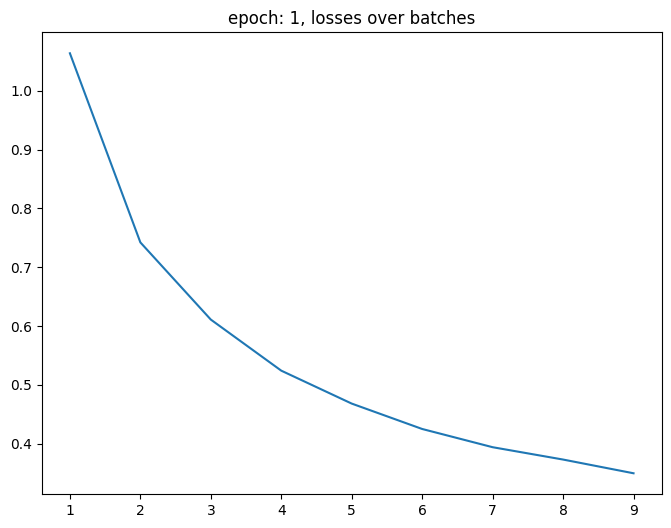

313/313 [==============================] - 1s 2ms/step - loss: 0.1687 - accuracy: 0.9455
------------------------------
epoch:1, val_loss: 0.1687, val_accuracy: 0.945500

epoch:2, batch:50, batch_loss: 0.1121,                    batch_accuracy: 0.9766, avg_loss: 0.1392
epoch:2, batch:100, batch_loss: 0.1977,                    batch_accuracy: 0.9531, avg_loss: 0.1514
epoch:2, batch:150, batch_loss: 0.1512,                    batch_accuracy: 0.9531, avg_loss: 0.1458
epoch:2, batch:200, batch_loss: 0.1921,                    batch_accuracy: 0.9453, avg_loss: 0.1412
epoch:2, batch:250, batch_loss: 0.1157,                    batch_accuracy: 0.9688, avg_loss: 0.1390
epoch:2, batch:300, batch_loss: 0.1780,                    batch_accuracy: 0.9453, avg_loss: 0.1361
epoch:2, batch:350, batch_loss: 0.0608,                    batch_accuracy: 0.9922, avg_loss: 0.1339
epoch:2, batch:400, batch_loss: 0.1165,                    batch_accuracy: 0.9531, avg_loss: 0.1341
epoch:2, batch:450, batch_loss

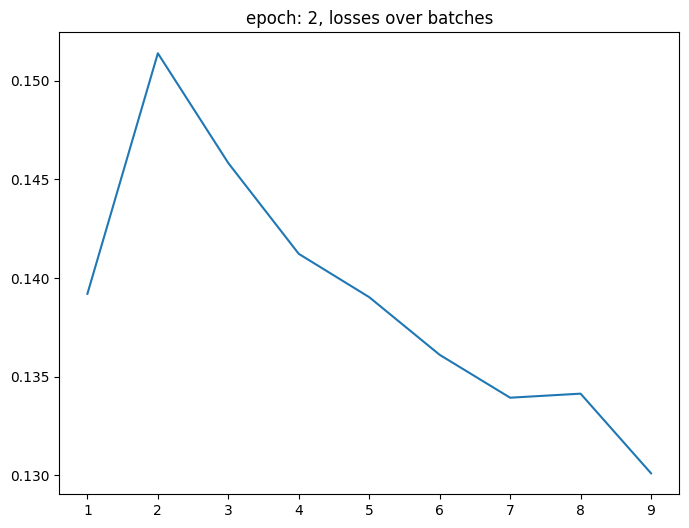

313/313 [==============================] - 1s 3ms/step - loss: 0.1253 - accuracy: 0.9582
------------------------------
epoch:2, val_loss: 0.1253, val_accuracy: 0.958200

epoch:3, batch:50, batch_loss: 0.0783,                    batch_accuracy: 0.9766, avg_loss: 0.0892
epoch:3, batch:100, batch_loss: 0.1158,                    batch_accuracy: 0.9688, avg_loss: 0.0945
epoch:3, batch:150, batch_loss: 0.1123,                    batch_accuracy: 0.9766, avg_loss: 0.0902
epoch:3, batch:200, batch_loss: 0.1424,                    batch_accuracy: 0.9531, avg_loss: 0.0892
epoch:3, batch:250, batch_loss: 0.0520,                    batch_accuracy: 0.9922, avg_loss: 0.0890
epoch:3, batch:300, batch_loss: 0.1298,                    batch_accuracy: 0.9531, avg_loss: 0.0885
epoch:3, batch:350, batch_loss: 0.0342,                    batch_accuracy: 0.9844, avg_loss: 0.0877
epoch:3, batch:400, batch_loss: 0.0647,                    batch_accuracy: 0.9766, avg_loss: 0.0881
epoch:3, batch:450, batch_loss

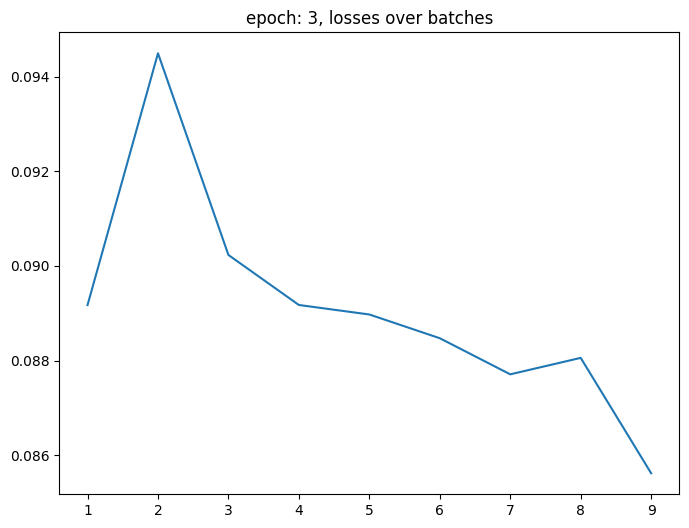

313/313 [==============================] - 1s 3ms/step - loss: 0.0968 - accuracy: 0.9688
------------------------------
epoch:3, val_loss: 0.0968, val_accuracy: 0.968800



In [8]:
MONITOR_STEP = 50 #50개의 배치 훈련

for epoch in range(1, 4): #epoch 반복할 루프 정하기
    batch = 1
    total_loss = 0
    losses = []
    for x, y in get_batches(x_train, y_train, batch_size=128): #x, y를 반환받아 매개변수로 입력
        # 배치별 훈련
        loss, acc = model.train_on_batch(x, y) #각 배치에 대한 반복 훈련이 필요하다.
        total_loss += loss

        # 출력
        if batch % MONITOR_STEP == 0:
            losses.append(total_loss / batch)
            print(f'epoch:{epoch}, batch:{batch}, batch_loss: {loss:.4f},\
                    batch_accuracy: {acc:.4f}, avg_loss: {total_loss / batch:.4f}')
        batch += 1
        #1개 배치에 대한 훈련을 진행하며 손실과 평가 지표에 대한 결과를 반환한다.
        # 배치별 손실을 누적으로 합하여 전체 배치의 개수로 나누어 주면 평균 손실을 산출할 수 있다.
        # 배치별 손실을 리스트에 추가하여 1epoch의 훈련이 끝난 후 배치별 손실 변화를 시각화 할 수 있다.

    # Loss 시각화
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(1, batch // MONITOR_STEP+1), losses)
    plt.title(f'epoch: {epoch}, losses over batches')
    plt.show()

    # 결과 출력
    loss, acc = model.evaluate(x_test, y_test)
    print('---'*10)
    print(f'epoch:{epoch}, val_loss: {loss:.4f}, val_accuracy: {acc:4f}')
    print()